In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters
m = 2
l = 100
alpha = 0.1
MaxIter = 1000
tanh = lambda x: np.tanh(x)
# derivative for tanh
dtanh = lambda x: 4.0 / np.power(np.exp(x) + np.exp(-x), 2)

In [3]:
# dataset
x = np.array([-0.5, 0.5]).reshape(2,1)
y = np.array([-0.5, 0.5]).reshape(2,1)

In [4]:
def trainingAlgorithm(l, alpha, w_scaling, x, y, MaxIter):
    # weight initialization
    w = np.ones((l,))*w_scaling
    # array with activations
    m = x.shape[0]
    h = np.zeros((m,l+1))
    h[:,:1] = x
    cost = np.zeros(MaxIter)
    
    for epoch in range(MaxIter):
        # forward propagation to compute activations 
        #and pre-nonlinear values
        u = np.zeros((m, l))
        for k in range(l):
            u[:, k:k+1] = h[:, k:k+1] * w[k]
            h[:, k+1:k+2] = tanh(u[:, k:k+1])
            
        # compute the cost for new iteration
        cost[epoch] = 1.0/(2*m) *np.sum(np.matmul(\
                                                  np.transpose(y-h[:, l:l+1]),y-h[:, l:l+1]))
        
        # backward propagation 
        g = np.zeros((m, l))
        g[:,l-1:l] = dtanh(u[:, l-1:l]) * (h[:, l:l+1] - y) / m
        for k in range(l-2,0,-1):
            g[:, k:k+1] = dtanh(u[:, k:k+1]) * g[:, k+1:k+2] * w[k+1]
        
        # gradient descent
        for k in range(0,l):
            w[k] = w[k] - alpha*np.sum(np.matmul\
                            (np.transpose(h[:,k:k+1]), g[:, k:k+1]))
            
        if epoch == 0:
            print("h[:,k]")
            print(h)
            print("g[:,k]")
            print(g)
            
    return w, cost

# 1 (a)

In [5]:
w_scaling = 1.0

In [6]:
aw, acost = trainingAlgorithm(l, alpha, w_scaling, x, y, MaxIter)

h[:,k]
[[-0.5        -0.46211716 -0.43180818 -0.40683132 -0.38577888 -0.36771555
  -0.35199191 -0.33814089 -0.32581665 -0.31475686 -0.30475838 -0.29566112
  -0.28733694 -0.2796819  -0.27261064 -0.26605237 -0.25994775 -0.25424666
  -0.24890641 -0.2438904  -0.23916701 -0.23470881 -0.23049181 -0.22649498
  -0.22269978 -0.21908976 -0.21565033 -0.21236842 -0.20923235 -0.20623162
  -0.20335674 -0.20059914 -0.19795105 -0.1954054  -0.19295574 -0.19059617
  -0.18832129 -0.18612616 -0.18400621 -0.18195725 -0.17997538 -0.17805703
  -0.17619887 -0.17439781 -0.17265097 -0.1709557  -0.1693095  -0.16771005
  -0.16615517 -0.16464282 -0.1631711  -0.16173823 -0.16034251 -0.15898238
  -0.15765634 -0.15636298 -0.155101   -0.15386913 -0.1526662  -0.15149109
  -0.15034275 -0.14922017 -0.1481224  -0.14704854 -0.14599774 -0.14496918
  -0.14396208 -0.14297572 -0.14200938 -0.1410624  -0.14013414 -0.13922399
  -0.13833137 -0.13745572 -0.13659651 -0.13575324 -0.13492541 -0.13411256
  -0.13331425 -0.13253004 -0.13

In [7]:
acost

array([  7.26891411e-02,   6.54382545e-02,   5.78778831e-02,
         5.03761631e-02,   4.32850865e-02,   3.68576414e-02,
         3.12170167e-02,   2.63764474e-02,   2.22801557e-02,
         1.88404716e-02,   1.59622075e-02,   1.35554986e-02,
         1.15411342e-02,   9.85180789e-03,   8.43145619e-03,
         7.23386604e-03,   6.22112834e-03,   5.36219148e-03,
         4.63160543e-03,   4.00847216e-03,   3.47558624e-03,
         3.01873874e-03,   2.62615659e-03,   2.28805177e-03,
         1.99625890e-03,   1.74394340e-03,   1.52536594e-03,
         1.33569173e-03,   1.17083564e-03,   1.02733601e-03,
         9.02251412e-04,   7.93075941e-04,   6.97669422e-04,
         6.14199742e-04,   5.41095015e-04,   4.77003786e-04,
         4.20761807e-04,   3.71364222e-04,   3.27942205e-04,
         2.89743292e-04,   2.56114764e-04,   2.26489579e-04,
         2.00374439e-04,   1.77339625e-04,   1.57010336e-04,
         1.39059285e-04,   1.23200355e-04,   1.09183160e-04,
         9.67883649e-05,

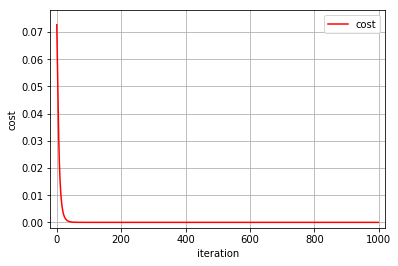

In [8]:
plt.plot(acost, 'r-', label='cost')
#plt.title("Cost for 1 (a) case")
plt.xlabel('iteration')
plt.axis([-20,1020,-0.002,0.078])
plt.ylabel('cost')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 1 (b)

In [9]:
w_scaling = 5.0

In [10]:
bw, bcost = trainingAlgorithm(l, alpha, w_scaling, x, y, MaxIter)

h[:,k]
[[-0.5        -0.9866143  -0.9998962  -0.99990911 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912 -0.99990912
  -0.99990912 -0.99990912 -0.99

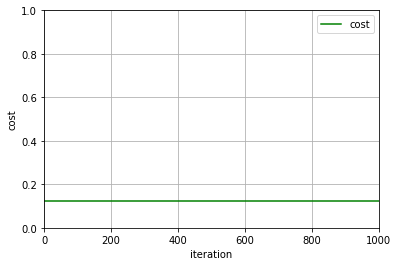

In [11]:
x_a = np.linspace(0,999,num=1000)
plt.plot(x_a,bcost, 'g-', label='cost')
plt.axis([0,1000,0,1])
#plt.title("Cost for 1 (a) case")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [12]:
bcost

array([ 0.12495456,  0.12495456,  0.12495456,  0.12495456,  0.12495456,
        0.12495456,  0.12495456,  0.12495456,  0.12495456,  0.12495456,
        0.12495456,  0.12495456,  0.12495456,  0.12495455,  0.12495455,
        0.12495455,  0.12495455,  0.12495455,  0.12495455,  0.12495455,
        0.12495455,  0.12495455,  0.12495455,  0.12495455,  0.12495455,
        0.12495454,  0.12495454,  0.12495454,  0.12495454,  0.12495454,
        0.12495454,  0.12495454,  0.12495454,  0.12495454,  0.12495454,
        0.12495454,  0.12495454,  0.12495453,  0.12495453,  0.12495453,
        0.12495453,  0.12495453,  0.12495453,  0.12495453,  0.12495453,
        0.12495453,  0.12495453,  0.12495453,  0.12495453,  0.12495452,
        0.12495452,  0.12495452,  0.12495452,  0.12495452,  0.12495452,
        0.12495452,  0.12495452,  0.12495452,  0.12495452,  0.12495452,
        0.12495452,  0.12495451,  0.12495451,  0.12495451,  0.12495451,
        0.12495451,  0.12495451,  0.12495451,  0.12495451,  0.12

There is a difference between h[:,k] and g[:,k] in 1(b) and 1(a). It is observed in the fact that activation gradients g[:,k] values are very close to zero in 1(b) while in 1(a) they are different and not that close to 0, which results in very tiny change in the values of activations and eventually causes fail in training and non-convergance; 
also h[:,k] in 1 (a) change from -0.5..-0.1 for x[0]=-0.5 and 0.5..0.1 for x[1]=0.5, while h[:,k] in 1(b) are change from -0.5..-0.999 and 0.5..0.999 respectively, so the values of activations increase till [-0.999,0.999] in the direction of forward propagation in 1(b), while in 1(a) h[:,k] become closer to 0

# 1 (c)

We can see that as k increases h[:,k] gets closer to [-1, 1], that can be explained by the way we compute, 
h[:,k] = tanh(h[:,k-1]*w[k]) =approx [tanh(-1*5), tanh(1*5)], and because of tanh function that sends big positive values to +1 and big negative values to -1, the value of h[:,k] turns to [-1, 1] 
As from 1 (b) it is visible that as k decreases the values of g[:,k] changes significantly and eventually turns to 0. This can be explained as following, 
g[:,k] = dtanh(h[:,k-1]*w[k])*g[k+1]*w[k+1] =approx [dtanh(-1*5)*g[k+1]*w[k+1], dtanh(1*5)*g[k+1]*w[k+1]] 
and since dtanh(-5) and dtanh(5) approaches 0, g[:,k] gets multiplied by previous value of g[:,k-1] which is close to 0 as well as dtanh(h[:,k-1]*w[k]) which is always close to 0. That's why activation gradients vanish
And lastly, dw[k] = h[:,k-1]^T * g[:,k] which is approaching 0 due to multiplication by g[:,k]
Hence weights don't get updated and training fails

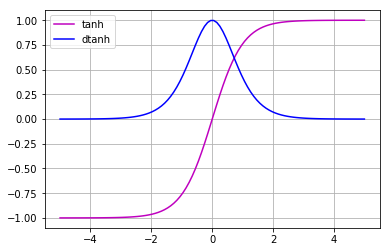

In [13]:
p_x = np.linspace(-5,5,num=100)
p_y = tanh(p_x)
plt.plot(p_x, p_y, 'm-',  label='tanh')
dy = dtanh(p_x)
plt.plot(p_x, dy, 'b-',  label='dtanh')
plt.axis([-5.5,5.5,-1.1,1.1])
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 1 (d)

In [14]:
w_scaling = 0.9

In [15]:
dw, dcost = trainingAlgorithm(l, alpha, w_scaling, x, y, MaxIter)

h[:,k]
[[ -5.00000000e-01  -4.21899005e-01  -3.62454815e-01  -3.15110593e-01
   -2.76233247e-01  -2.43611525e-01  -2.15803461e-01  -1.91817209e-01
   -1.70940671e-01  -1.52644199e-01  -1.36521989e-01  -1.22255180e-01
   -1.09587776e-01  -9.83104276e-02  -8.82492156e-02  -7.92577058e-02
   -7.12111962e-02  -6.40024697e-02  -5.75385988e-02  -5.17384988e-02
   -4.65310233e-02  -4.18534568e-02  -3.76503057e-02  -3.38723119e-02
   -3.04756405e-02  -2.74212005e-02  -2.46740714e-02  -2.22030146e-02
   -1.99800538e-02  -1.79801105e-02  -1.61806871e-02  -1.45615891e-02
   -1.31046799e-02  -1.17936651e-02  -1.06139000e-02  -9.55221944e-03
   -8.59678570e-03  -7.73695275e-03  -6.96314493e-03  -6.26674840e-03
   -5.64001376e-03  -5.07596879e-03  -4.56834013e-03  -4.11148295e-03
   -3.70031776e-03  -3.33027368e-03  -2.99723733e-03  -2.69750706e-03
   -2.42775158e-03  -2.18497295e-03  -1.96647312e-03  -1.76982396e-03
   -1.59284021e-03  -1.43355521e-03  -1.29019897e-03  -1.16117855e-03
   -1.0450603

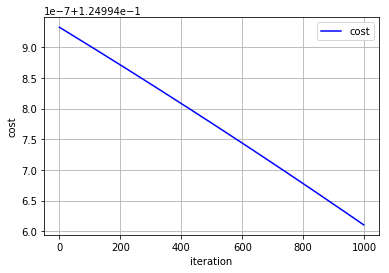

In [16]:
plt.plot(dcost, 'b-', label='cost')
#plt.title("Cost for 1 (a) case")
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend(loc='best')
plt.grid(True)
plt.show()

There is a difference between h[:,k] and g[:,k] in 1(c), 1(b) and 1(a). It is observed in the fact that activation gradients abs(g[:,k]) values are very close to zero (~ absolute values 2e-200..2e-005) in 1(b) while in 1(a) they are different around 3e-03..1e-01 and in 1 (c) around 6e-06..2e-01, so gradients in 1(c) are closer to 0 than in 1(a) but more distant form 0 than in 1(b)
h[:,k] in 1 (a) change from -0.5..-0.1 for x[0]=-0.5 and 0.5..0.1 for x[1]=0.5, while h[:,k] in 1(b) are change from -0.5..-0.999 and 0.5..0.999 respectively, and in 1(c) abs(h[:,k]) change in range -5e-01..-1e-05 and 5e-01..1e-05 for x=[-0.5, 0.5], so the values of activations in 1(c) approach 0 much faster than in 1(a) in the direction of forward propagation

# 1 (e)

We can see that as k increases h[:,k] from [-5e-01, 5e-01] gets closer to [-1e-05, 1e-05], that can be explained by the way we compute, h[:,k] = tanh(h[:,k-1]*w[k]) =approx [tanh(h[0,k-1]*0.9), tanh(h[1,k-1]*0.9)], and because of tanh function is monotonically increasing abs(h[:,k-1]) > abs(h[:,k]) (since x = [-0.5, 0.5])
As from 1 (d) it is visible that as k decreases the values of abs(g[:,k]) change from 2e-01 to 6e-06. This can be explained as following 

So, since dw[k] = h[:,k-1]^T * g[:,k] and on first half of the network abs(h[:,k]) are around 5e-01..4e-03 and abs(g[:,k]) are around 6e-06..1e-03, their product results in similar small values around 1e-06 and similar for second half of the network  where activation values are small and activation gradients are bigger, but still their total product is a small value of order 1e-06, which give us small weight gradients for the whole network

Hence weights get very small gradients and training fails